# Aircraft Data Visualization and Insights
This notebook explores aircraft model matching through rich visualizations.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

matched_results = pd.read_csv("data_sources/binding/matched_results.csv")
aircraft_data_cleaned = pd.read_csv("data_sources/aircraft_data_cleaned.csv")

## Top Matched Aircraft Models

C:\Users\chenc\AppData\Local\Temp\ipykernel_10572\3939889050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_models.values, y=top5_models.index, palette="muted")


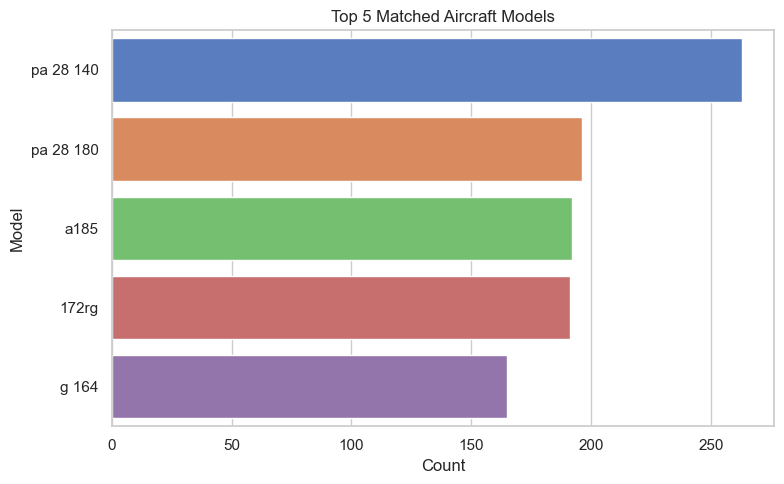

In [12]:
top5_models = matched_results["Matched_Aircraft_Model"].value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top5_models.values, y=top5_models.index, palette="muted")
plt.title("Top 5 Matched Aircraft Models")
plt.xlabel("Count")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

## Comparison of Similarity Metrics

C:\Users\chenc\AppData\Local\Temp\ipykernel_10572\2032319155.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Metric", y="Score", data=melted_metrics, palette="Set2")


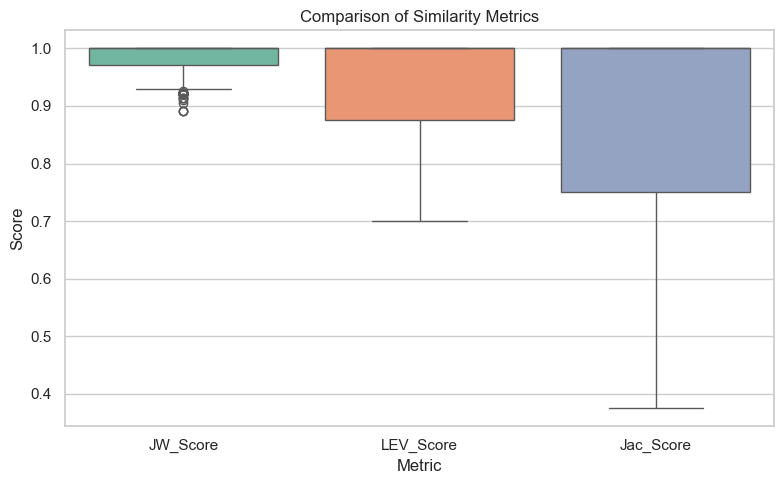

In [13]:
melted_metrics = matched_results.melt(
    value_vars=["JW_Score", "LEV_Score", "Jac_Score"],
    var_name="Metric", value_name="Score"
)

plt.figure(figsize=(8, 5))
sns.boxplot(x="Metric", y="Score", data=melted_metrics, palette="Set2")
plt.title("Comparison of Similarity Metrics")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

## Production Timelines of Top 20 Aircraft Models

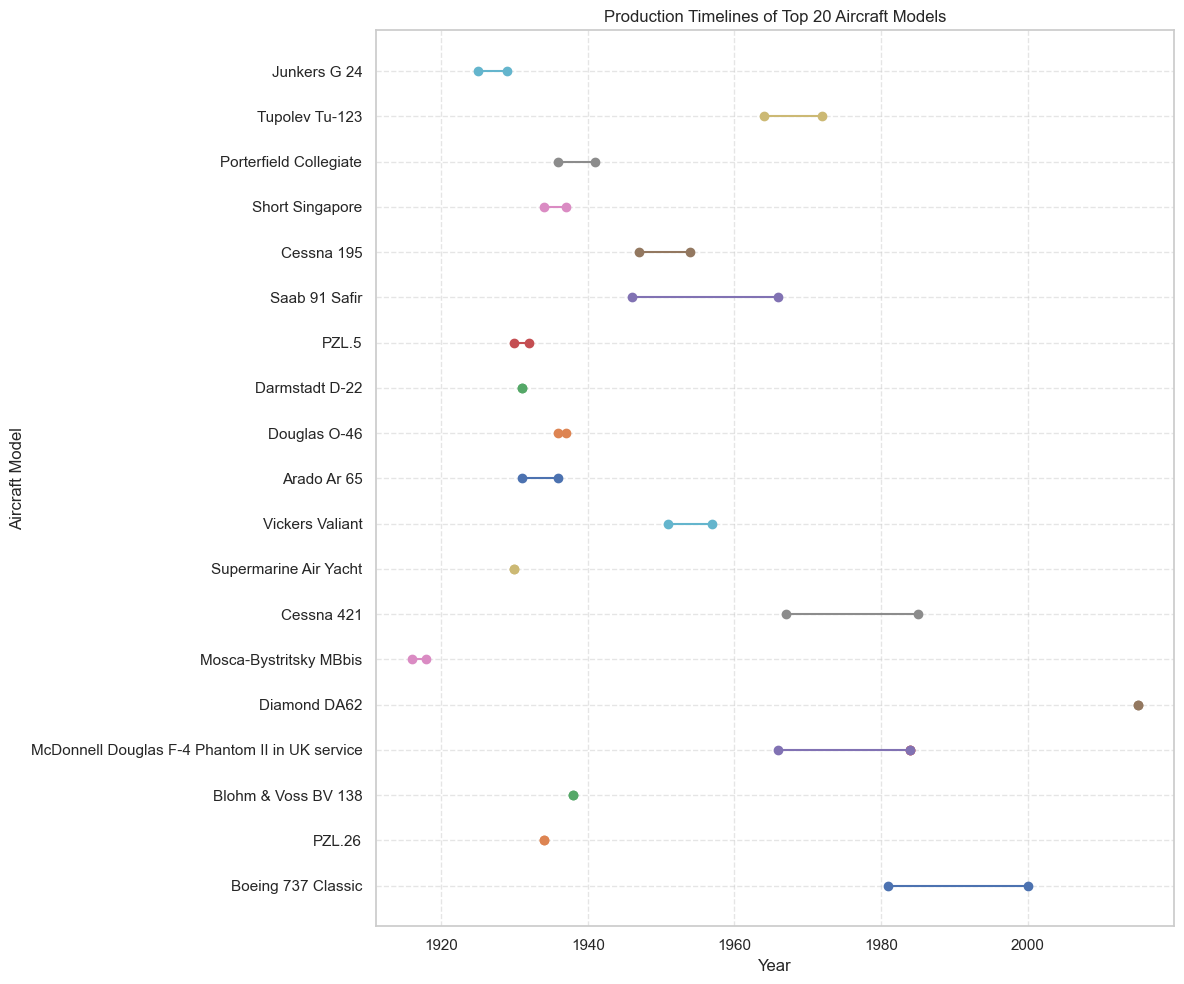

In [14]:
top20_aircrafts = aircraft_data_cleaned["aircraft"].value_counts().head(20).index
timeline_data = aircraft_data_cleaned[aircraft_data_cleaned["aircraft"].isin(top20_aircrafts)]
timeline_data = timeline_data.dropna(subset=["startDate", "endDate"])

plt.figure(figsize=(12, 10))
for i, (index, row) in enumerate(timeline_data.iterrows()):
    plt.plot([row["startDate"], row["endDate"]], [row["aircraft"]] * 2, marker="o")

plt.title("Production Timelines of Top 20 Aircraft Models")
plt.xlabel("Year")
plt.ylabel("Aircraft Model")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()